# PCA

**PCA** es una transformación lineal usada para reducir dimensiones en los datos.

¿Por qué reducir dimensiones?

Existen varias razones, entre ellas:
+ Mejora de la performance
+ Mejor manejo de la dispersión de los datos
+ Maldición de las dimensiones (ojo-también existe la bendición)


Hay dos maneras diferentes de hacer esta transformación:

+ A través de la matriz de correlaciones 
+ A través de la matriz de covarianzas 

Ambas matrices son simétricas y diagonalizables. De hecho, el Teorema Espectral dice que si una matriz es hermítica, cuadrada y de dimensión finita, entonces existe una base de vectores propios donde dicha matriz puede ser representada.
Esto quiere decir que podemos cambiar de base para después proyectar, reduciendo las dimensiones e intentando conservar la máxima información en el nuevo subespacio.

![gio1](gioconda.jpeg)
![gio2](gioconda_lego.png)

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

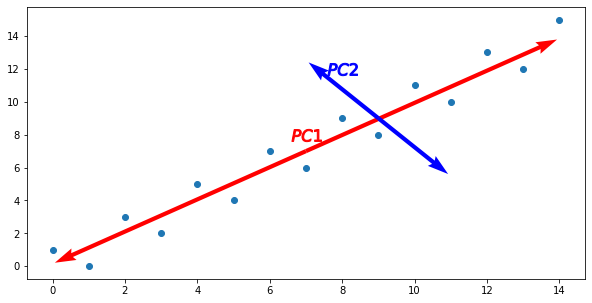

In [2]:
plt.figure(figsize=(10, 5))
plt.scatter([i for i in range(15)],
            [i+1 if i%2==0 else i-1 for i in range(15)])

plt.quiver(7, 7, 9, 4, color='r', scale=20)
plt.quiver(7, 7, -9, -4, color='r', scale=20)
plt.plot(7, 8, marker='$PC1$', ms=30, color='r')

plt.quiver(9, 9, -5, 4, color='b', scale=40)
plt.quiver(9, 9, 5, -4, color='b', scale=40)
plt.plot(8, 12, marker='$PC2$', ms=30, color='b');

Si lo rotamos y proyectamos, resulta:

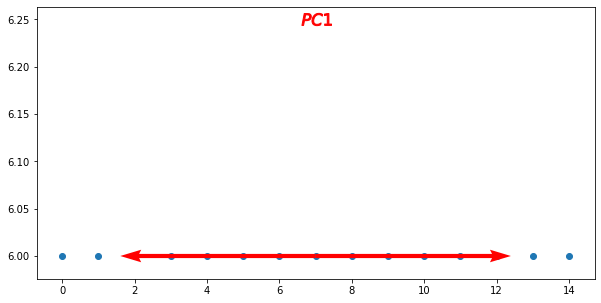

In [3]:
plt.figure(figsize=(10, 5))
plt.scatter([i for i in range(15)],
            [6 for i in range(15)])

plt.quiver(7, 6, 7, 0, color='r', scale=20)
plt.quiver(7, 6, -7, 0, color='r', scale=20)
plt.plot(7, 6.25, marker='$PC1$', ms=30, color='r');

##### Resumen PCA

+ Normalización de los datos
+ Obtener base de vectores propios desde matriz de correlacion o covarianza
+ Ordenar los vectores propios de mayor a menor según sus dimensiones en el nuevo subespacio
+ Matriz de proyección, con los autovectores seleccionados (W)
+ Se transforma X (los datos) según W (matriz de proyección)

### 1) Normalización

Recordemos, el primer paso de PCA es la normalización de los datos. 

Primero, veamos la 'estandarización'   ($N(\mu, \sigma)$):

$$\frac{x_i-\mu}{\frac{\sigma}{\sqrt{n}}}$$

Mínimo y máximo: 

$$\frac{x-min}{max-min}$$

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler  # normalización
from sklearn import datasets
from sklearn.decomposition import PCA    # PCA

import warnings
warnings.simplefilter('ignore')

In [3]:
df=pd.read_csv('iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
obj=df['variety']

In [5]:
data=df.drop(columns=['variety'])
data.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


1. Normalización

In [6]:
x=StandardScaler().fit_transform(data)

In [7]:
x

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [8]:
pd.DataFrame(x)

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


2. Aplicamos PCA

In [11]:
pca_ej=PCA()
pC=pca_ej.fit_transform(x)
pca_ej.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

(0.5, 1.01)

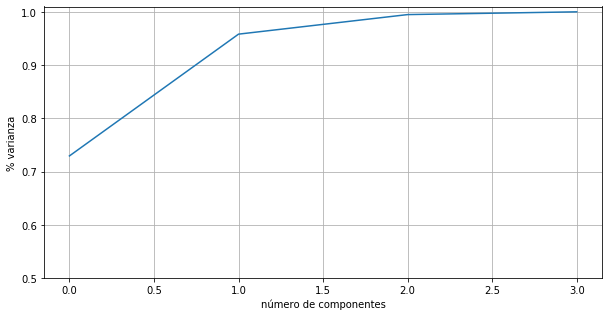

In [12]:
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca_ej.explained_variance_ratio_))
plt.grid()
plt.xlabel('número de componentes')
plt.ylabel('% varianza')
plt.ylim([0.5, 1.01])

In [13]:
pca=PCA(n_components=2)
principalComponents=pca.fit_transform(x)
pdf=pd.DataFrame(data=principalComponents, columns=['PC1','PC2'])

In [15]:
pdf

,PC1,PC2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


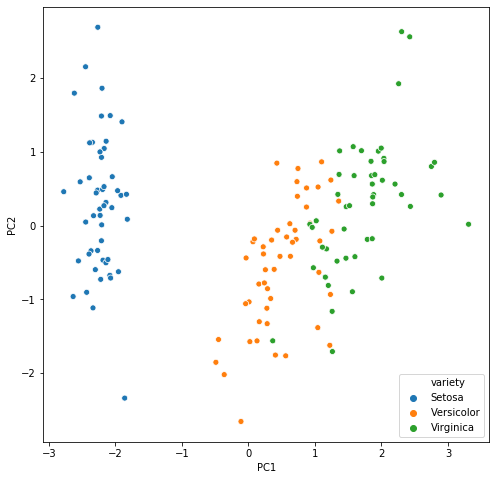

In [16]:
fig  = plt.figure(figsize=(8,8))
sns.scatterplot(pdf['PC1'],pdf['PC2'],hue=obj);

In [17]:
pca=PCA()
principalComponents=pca.fit_transform(x)
pdf=pd.DataFrame(data=principalComponents, columns=['PC1','PC2','PC3','PC4'])

In [18]:
pdf

,PC1,PC2,PC3,PC4
0,-2.264703,0.480027,-0.127706,-0.024168
1,-2.080961,-0.674134,-0.234609,-0.103007
2,-2.364229,-0.341908,0.044201,-0.028377
3,-2.299384,-0.597395,0.091290,0.065956
4,-2.389842,0.646835,0.015738,0.035923
...,...,...,...,...
145,1.870503,0.386966,0.256274,-0.389257
146,1.564580,-0.896687,-0.026371,-0.220192
147,1.521170,0.269069,0.180178,-0.119171
148,1.372788,1.011254,0.933395,-0.026129


## Ejemplo 2 

Para este ejemplo, utilizaremos un dataset obtenido de: https://archive.ics.uci.edu/ml/datasets/HTRU2

In [20]:
data=pd.read_csv('pulsar_stars.csv')
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [21]:
tar=data['target_class']

In [22]:
data=data.drop(columns=['target_class'])

Normalización a mano utilizando la fórmula

In [23]:
data_n_mano=(data-np.mean(data))/np.std(data)

In [24]:
data_n_mano

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
0,1.149317,1.334832,-0.669570,-0.400459,-0.319440,-0.370625,-0.072798,-0.287438
1,-0.334168,1.802265,-0.011785,-0.370535,-0.371102,-0.588924,0.504427,0.211581
2,-0.314372,-1.053322,-0.145233,-0.116593,-0.322107,-0.235328,-0.125996,-0.391373
3,1.000694,1.553254,-0.513409,-0.390178,-0.304404,-0.275666,-0.312265,-0.481300
4,-0.871402,-0.858879,0.115609,-0.104866,-0.388010,-0.763111,1.324026,1.386794
...,...,...,...,...,...,...,...,...
17893,0.988208,1.943284,-0.625655,-0.406697,-0.384010,-0.727295,1.586054,1.700034
17894,0.447319,0.429062,-0.328831,-0.234643,0.128776,0.939926,-1.189159,-0.906574
17895,0.321842,1.956220,-0.299334,-0.407492,0.299137,1.671568,-1.288079,-0.941330
17896,0.133628,1.074510,-0.260050,-0.291041,-0.361967,-0.664857,0.378257,0.275850


In [25]:
data_n=StandardScaler().fit_transform(data)

In [26]:
data_n

array([[ 1.14931702,  1.33483164, -0.66956953, ..., -0.37062547,
        -0.07279778, -0.28743812],
       [-0.3341682 ,  1.80226533, -0.01178476, ..., -0.5889241 ,
         0.50442694,  0.21158145],
       [-0.31437216, -1.05332222, -0.14523256, ..., -0.23532816,
        -0.12599609, -0.39137346],
       ...,
       [ 0.3218423 ,  1.95621968, -0.2993338 , ...,  1.67156847,
        -1.28807874, -0.94133005],
       [ 0.13362759,  1.07450972, -0.26005007, ..., -0.66485697,
         0.37825656,  0.27584987],
       [-2.10576204,  5.73546965,  0.87267394, ...,  1.97154554,
        -2.19732744, -0.97105168]])

In [27]:
pd.DataFrame(data_n)

,0,1,2,3,4,5,6,7
0,1.149317,1.334832,-0.669570,-0.400459,-0.319440,-0.370625,-0.072798,-0.287438
1,-0.334168,1.802265,-0.011785,-0.370535,-0.371102,-0.588924,0.504427,0.211581
2,-0.314372,-1.053322,-0.145233,-0.116593,-0.322107,-0.235328,-0.125996,-0.391373
3,1.000694,1.553254,-0.513409,-0.390178,-0.304404,-0.275666,-0.312265,-0.481300
4,-0.871402,-0.858879,0.115609,-0.104866,-0.388010,-0.763111,1.324026,1.386794
...,...,...,...,...,...,...,...,...
17893,0.988208,1.943284,-0.625655,-0.406697,-0.384010,-0.727295,1.586054,1.700034
17894,0.447319,0.429062,-0.328831,-0.234643,0.128776,0.939926,-1.189159,-0.906574
17895,0.321842,1.956220,-0.299334,-0.407492,0.299137,1.671568,-1.288079,-0.941330
17896,0.133628,1.074510,-0.260050,-0.291041,-0.361967,-0.664857,0.378257,0.275850


In [28]:
pca_ej=PCA()
pC=pca_ej.fit_transform(data_n)
pca_ej.explained_variance_ratio_

array([0.51675584, 0.26807564, 0.10116862, 0.0571781 , 0.03227836,
       0.01998491, 0.00255524, 0.00200328])

In [29]:
pca=PCA(n_components=2)


PCA(n_components=2)

In [30]:
df=pd.DataFrame(pca.fit_transform(data_n))
df.head()

,0,1
0,-1.278849,-1.273133
1,-1.020553,-0.201162
2,0.188289,0.432114
3,-1.015466,-1.469881
4,-0.822626,2.123651


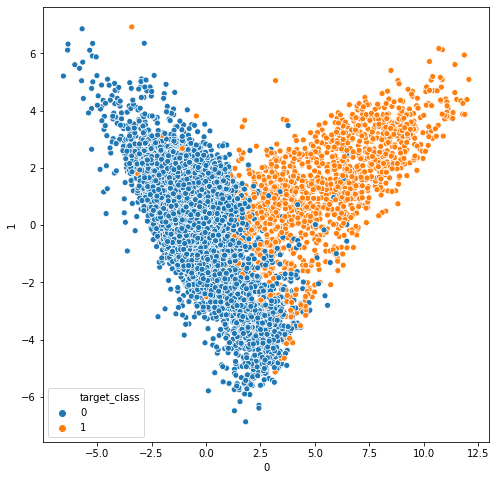

In [33]:
fig  = plt.figure(figsize=(8,8))
sns.scatterplot(df[df.columns[0]],df[df.columns[1]],hue=tar);

In [54]:
pca=PCA(n_components=3)
df3=pd.DataFrame(pca.fit_transform(data_n))
df3.head()

,0,1,2
0,-1.278849,-1.273133,0.016213
1,-1.020553,-0.201162,0.670478
2,0.188289,0.432114,-0.979766
3,-1.015466,-1.469881,-0.018832
4,-0.822626,2.123651,0.407953


In [34]:
from mpl_toolkits.mplot3d import Axes3D

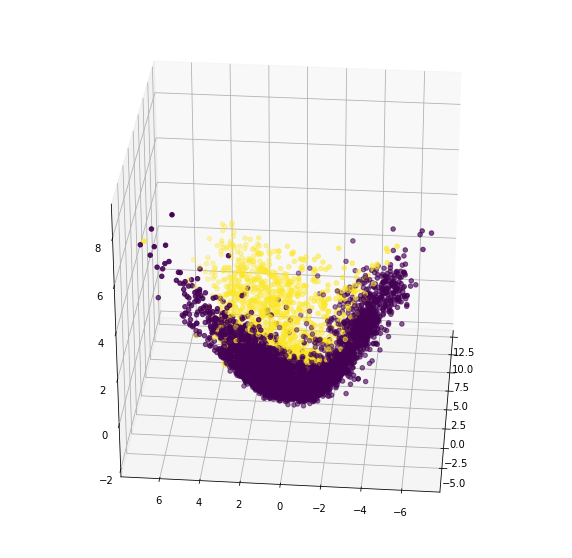

In [55]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df3[df3.columns[0]],df3[df3.columns[1]],df3[df3.columns[2]],c=tar)
ax.view_init(30, 185)
plt.show()

#### Ejemplo de pca con data sin normalizar

In [48]:
#¿qué pasa si no normalizamos?
pca=PCA(n_components=2)
df2=pd.DataFrame(pca.fit_transform(data))
df2.head()

,0,1
0,-27.191086,-29.677875
1,24.476215,-6.024175
2,-39.938920,-10.828048
3,-48.000825,-29.833257
4,147.919433,18.562548


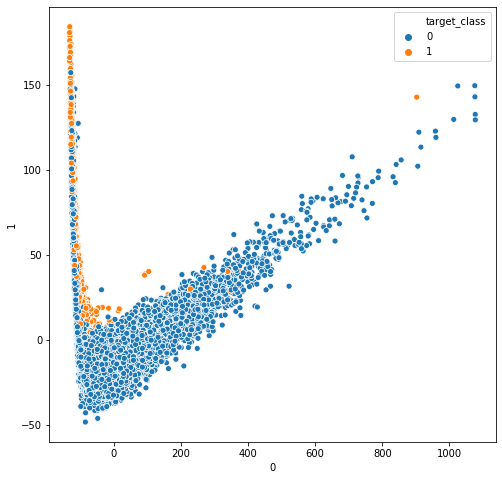

In [49]:
fig  = plt.figure(figsize=(8,8))
sns.scatterplot(df2[df2.columns[0]],df2[df2.columns[1]],hue=tar);

### MinMaxScaler para normalización de datos

In [50]:
data_mm_mano=(data-np.min(data))/(np.max(data)-np.min(data))
data_mm=MinMaxScaler().fit_transform(data)
np.sum(data_mm_mano-data_mm)

 Mean of the integrated profile                  1.568736e-13
 Standard deviation of the integrated profile    5.605374e-14
 Excess kurtosis of the integrated profile       1.882314e-13
 Skewness of the integrated profile              2.829209e-14
 Mean of the DM-SNR curve                        1.212409e-13
 Standard deviation of the DM-SNR curve          4.598752e-14
 Excess kurtosis of the DM-SNR curve            -2.881462e-13
 Skewness of the DM-SNR curve                    6.918713e-14
dtype: float64

In [52]:
data_mm

array([[0.72134164, 0.41768745, 0.16504291, ..., 0.11368057, 0.29498574,
        0.06388987],
       [0.51762787, 0.46090841, 0.23541516, ..., 0.0725243 , 0.36401483,
        0.10844339],
       [0.52034628, 0.19686832, 0.22113842, ..., 0.13918843, 0.28862387,
        0.05461031],
       ...,
       [0.60771193, 0.4751437 , 0.2046521 , ..., 0.49869934, 0.14965285,
        0.00550903],
       [0.58186609, 0.39361695, 0.20885482, ..., 0.05820853, 0.34892638,
        0.11418141],
       [0.27435072, 0.82458965, 0.33003783, ..., 0.5552546 , 0.04091771,
        0.00285542]])

In [53]:
pd.DataFrame(data_mm)

,0,1,2,3,4,5,6,7
0,0.721342,0.417687,0.165043,0.015627,0.013382,0.113681,0.294986,0.063890
1,0.517628,0.460908,0.235415,0.018268,0.006560,0.072524,0.364015,0.108443
2,0.520346,0.196868,0.221138,0.040677,0.013030,0.139188,0.288624,0.054610
3,0.700933,0.437884,0.181750,0.016534,0.015368,0.131583,0.266348,0.046581
4,0.443854,0.214847,0.249044,0.041712,0.004327,0.039684,0.462029,0.213369
...,...,...,...,...,...,...,...,...
17893,0.699218,0.473948,0.169741,0.015077,0.004855,0.046437,0.493364,0.241336
17894,0.624942,0.333936,0.201496,0.030260,0.072572,0.360761,0.161482,0.008612
17895,0.607712,0.475144,0.204652,0.015007,0.095069,0.498699,0.149653,0.005509
17896,0.581866,0.393617,0.208855,0.025283,0.007766,0.058209,0.348926,0.114181
